In [1]:
import numpy as np 

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
import time

In [2]:

def load_test_trajectory(time_mult=1.0):
        """Loads the test_trajectory.txt
        
        Args:
            time_mult: a multiplier to decrease the total time of the trajectory
        
        """
        data  = np.loadtxt('../python/test_trajectory.txt', delimiter=',', dtype='Float64')
        position_trajectory = []
        time_trajectory = []
        yaw_trajectory = []
        current_time = time.time()
        for i in range(len(data[:,0])):
            position_trajectory.append(data[i,1:4])
            time_trajectory.append(data[i,0]*time_mult+current_time)
        for i in range(0,len(position_trajectory)-1):
            yaw_trajectory.append(np.arctan2(position_trajectory[i+1][1]-position_trajectory[i][1],position_trajectory[i+1][0]-position_trajectory[i][0]))
        yaw_trajectory.append(yaw_trajectory[-1])
        return(position_trajectory,time_trajectory,yaw_trajectory)

position_trajectory,time_trajectory,yaw_trajectory = load_test_trajectory(time_mult=0.5)

In [3]:
x_path, y_path, z_path = zip(*position_trajectory)
x_path = np.array(x_path)
y_path = np.array(y_path)
z_path = np.array(z_path)
z_path = -z_path

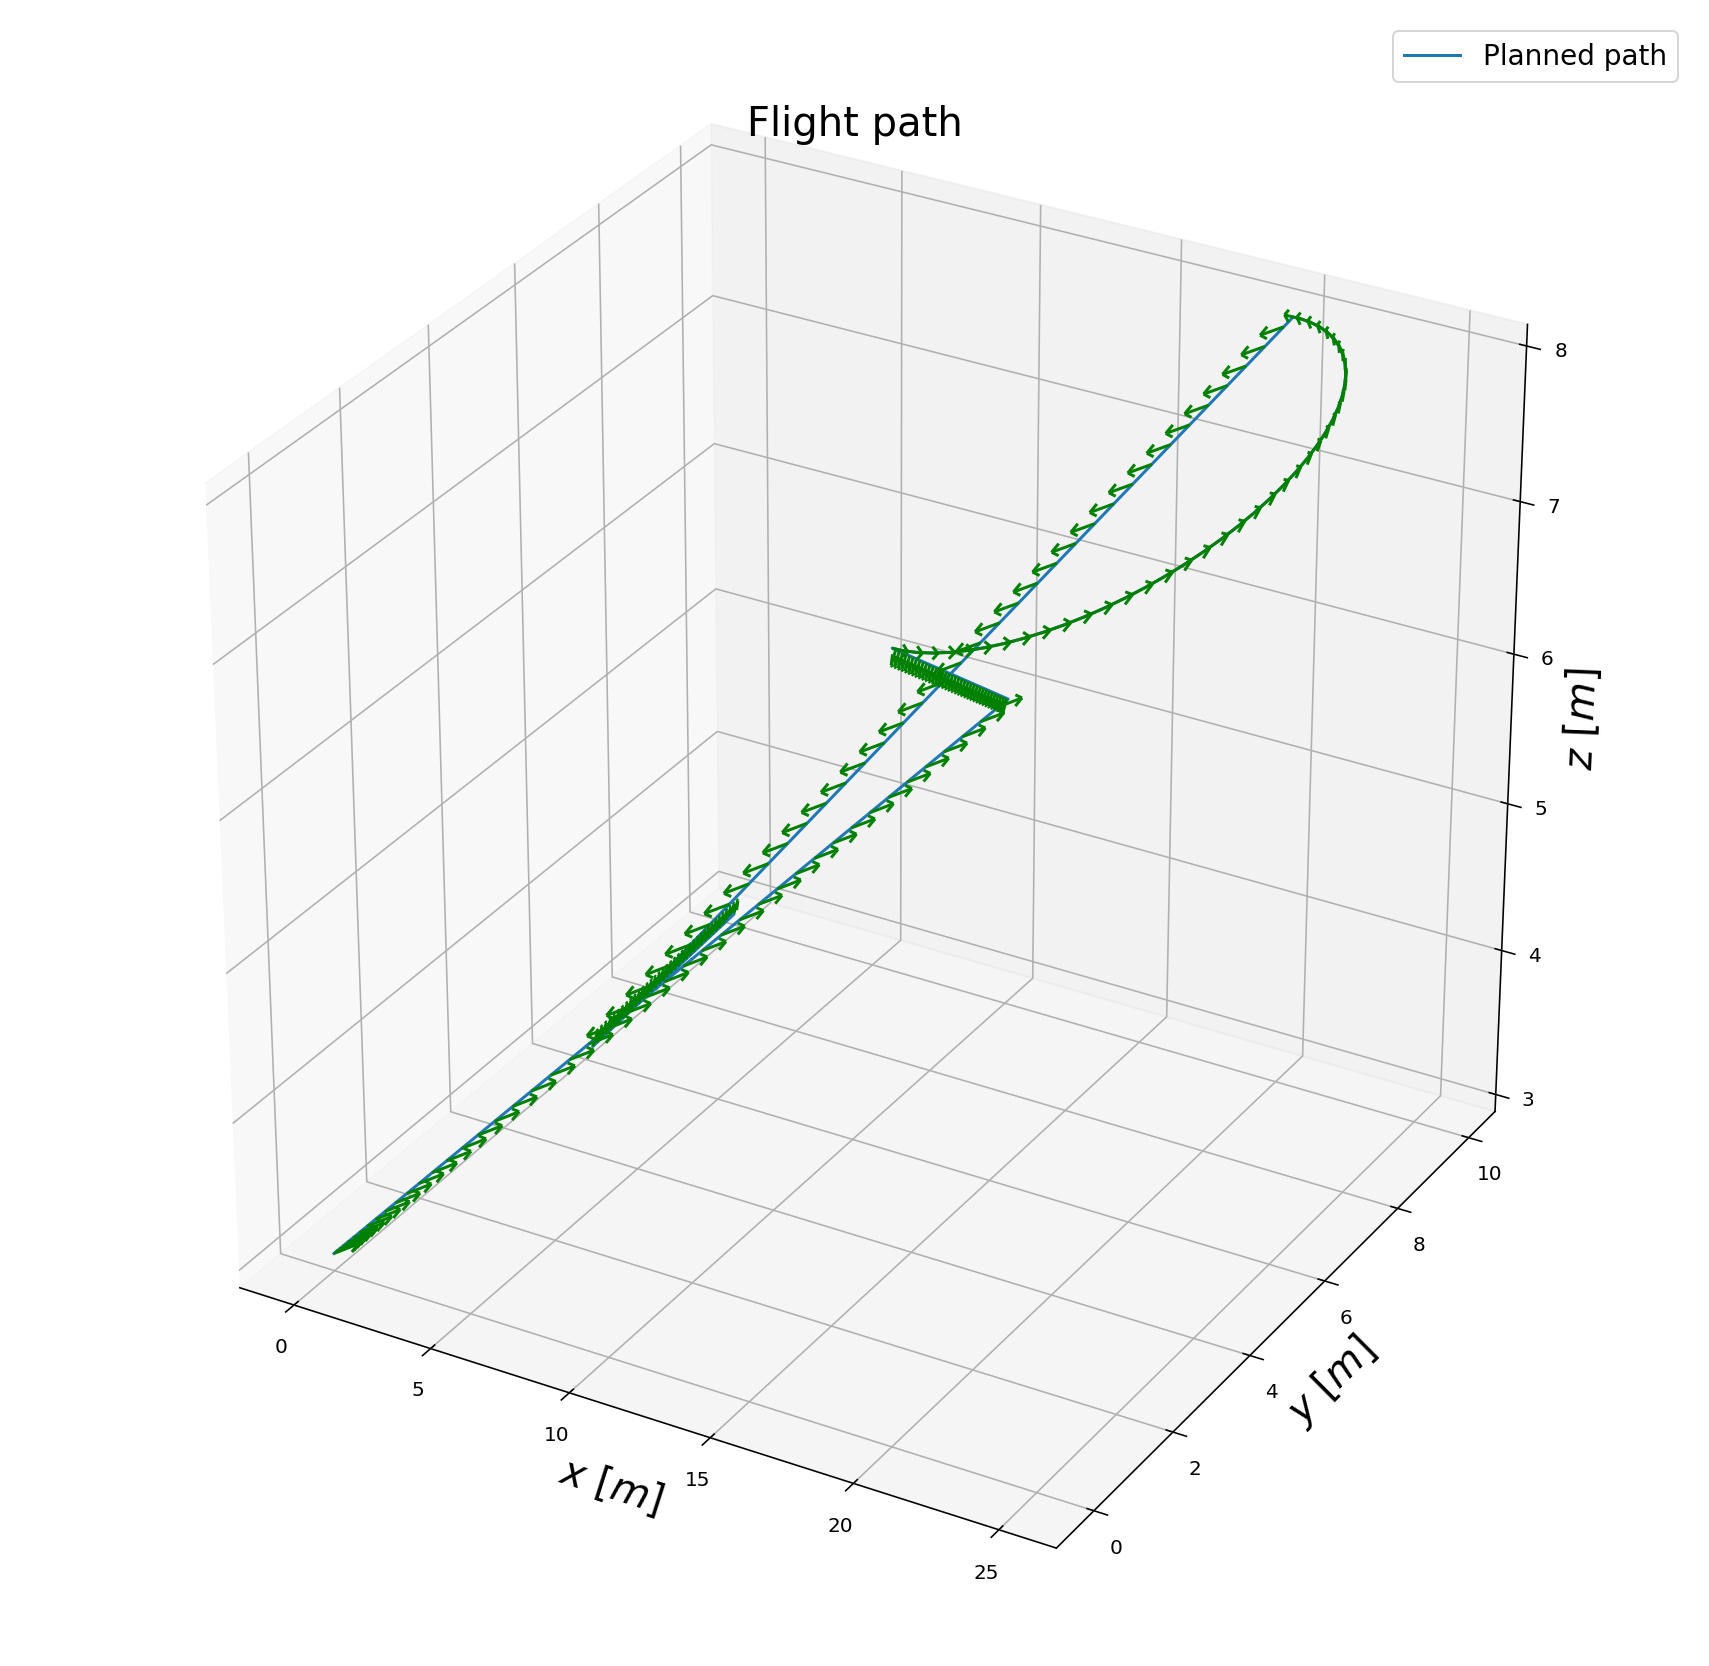

In [4]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.plot(x_path, y_path, z_path)
u = np.cos(yaw_trajectory)
v = np.sin(yaw_trajectory)
w = np.zeros(len(yaw_trajectory))
for i in range(0,len(z_path),2):
    ax.quiver(x_path[i], y_path[i], z_path[i], u[i], v[i], w[i], length=0.5, normalize=True,color='green')
plt.title('Flight path').set_fontsize(20)
ax.set_xlabel('$x$ [$m$]').set_fontsize(20)
ax.set_ylabel('$y$ [$m$]').set_fontsize(20)
ax.set_zlabel('$z$ [$m$]').set_fontsize(20)
plt.legend(['Planned path'],fontsize = 14)
plt.show()

In [5]:
raw_test_trajectory = np.loadtxt('../python/test_trajectory.txt', delimiter=',', dtype='Float64')

In [6]:
stay_there = raw_test_trajectory.copy()
for i in range(stay_there.shape[0]):
    stay_there[i][1:4] = np.array([0., 0., -3.])
np.savetxt('../python/trajectories/stay_there.txt', stay_there, delimiter=',')

In [7]:
go_north = raw_test_trajectory.copy()
for i in range(go_north.shape[0]):
    x = go_north[i][0] * 0.5
    go_north[i][1:4] = np.array([x, 0., -3.])
np.savetxt('../python/trajectories/go_north.txt', go_north, delimiter=',')

In [8]:
go_north_east = raw_test_trajectory.copy()
for i in range(go_north_east.shape[0]):
    x = go_north_east[i][0] * 0.5
    go_north_east[i][1:4] = np.array([x, x, -3.])
np.savetxt('../python/trajectories/go_north_east.txt', go_north_east, delimiter=',')